<a href="https://colab.research.google.com/github/mcnica89/DNNs/blob/main/Feature_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
np.random.seed(42)

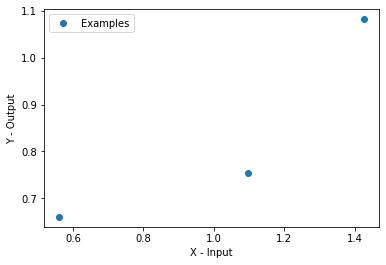

In [2]:
N_in = 1 #Only 1 dimensional input is implemented here!
N_ex = 3

X_max = 1.5
X_ex = X_max*np.random.rand(N_ex) 
Y_ex = X_ex + np.random.rand(N_ex) - 0.5

plt.plot(X_ex,Y_ex,marker='o',linestyle='None',label="Examples")
plt.xlabel("X - Input")
plt.ylabel("Y - Output")
plt.legend()

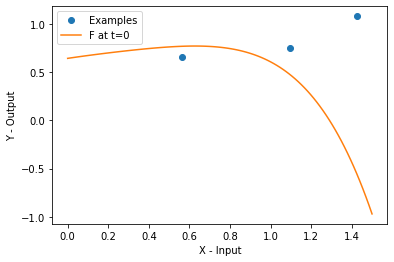

In [3]:
N_par = 6

#In this example we will implement featurs that are polynomials
def phi(x): 
  #Inputs a numpy vector and returns a 
  return np.stack([x**pow for pow in range(N_par) ])

#Phi applied to the examples
Phi_X_ex = phi(X_ex)

#Test points
N_test = 100
X_test = np.linspace(0.0,X_max,N_test)

Phi_X_test = phi(X_test)
K_Xtest_Xtest = 1/N_par * Phi_X_test.T @ Phi_X_test

Theta_0 = np.random.randn(N_par)
F_X_test_0 = 1/np.sqrt(N_par)*Theta_0 @ Phi_X_test

plt.plot(X_ex,Y_ex,marker='o',linestyle='None',label="Examples")
plt.plot(X_test,F_X_test_0,marker='',linestyle='-',label="F at t=0")

plt.xlabel("X - Input")
plt.ylabel("Y - Output")
plt.legend()

Text(0.5, 1.0, '20 samples at initialization and 2*SD prediction')

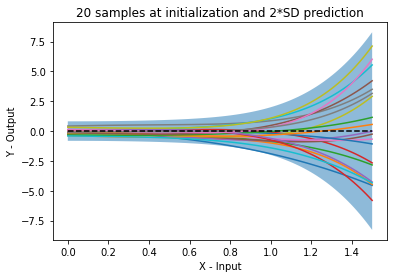

In [4]:
N_samples = 20
for i in range(N_samples):
  Theta_0 = np.random.randn(N_par)
  F_X_test_0 = 1/np.sqrt(N_par)*Theta_0 @ Phi_X_test
  plt.plot(X_test,F_X_test_0,marker='',linestyle='-')

Variance_0 = np.diagonal(K_Xtest_Xtest)
SD = np.sqrt(Variance_0)
plt.plot(X_test,np.zeros_like(X_test),ls='--',color='k')
plt.fill_between(X_test, -2*SD,+2*SD,alpha=0.5)

plt.xlabel("X - Input")
plt.ylabel("Y - Output")
plt.title(f"{N_samples} samples at initialization and 2*SD prediction") 

In [5]:
Theta_0 = np.random.randn(N_par)

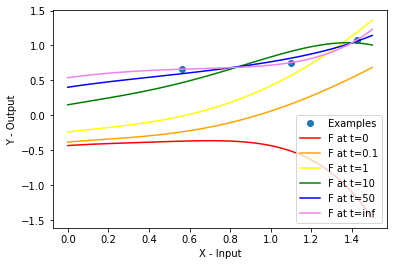

In [6]:
F_X_test_0 = 1/np.sqrt(N_par)*Theta_0 @ Phi_X_test
Phi_X_ex = phi(X_ex)
F_X_ex_0 = 1/np.sqrt(N_par)*Theta_0 @ Phi_X_ex


plt.plot(X_ex,Y_ex,marker='o',linestyle='None',label="Examples")

#Kernel applied to the examples
K_Xex_Xex = 1/N_par * Phi_X_ex.T @ Phi_X_ex
K_inv = np.linalg.inv(K_Xex_Xex)
K_Xtest_Xex = 1/N_par * Phi_X_test.T @ Phi_X_ex

Id_Nex = np.eye(N_ex,N_ex)

colors = ['red','orange','yellow','green','blue', 'indigo', 'violet']

for i,t in enumerate([0, 0.1, 1, 10, 50]):
  exp_minustK = la.expm(-t*K_Xex_Xex)
  F_X_test_t = F_X_test_0 - K_Xtest_Xex @ K_inv @ (exp_minustK - Id_Nex) @ (Y_ex - F_X_ex_0)
  #EF_X_test_t = - K_Xtest_Xex @ K_inv @ (exp_minustK - Id_Nex) @ (Y_ex)
  plt.plot(X_test,F_X_test_t,marker='',linestyle='-',label=f"F at t={t}",color=colors[i])
  #plt.plot(X_test,EF_X_test_t,marker='',linestyle='--',color=colors[i])


F_X_test_inf = F_X_test_0 + K_Xtest_Xex @ K_inv @ (Y_ex - F_X_ex_0)
plt.plot(X_test,F_X_test_inf,marker='',linestyle='-',label="F at t=inf",color=colors[-1])


plt.xlabel("X - Input")
plt.ylabel("Y - Output")
plt.legend()

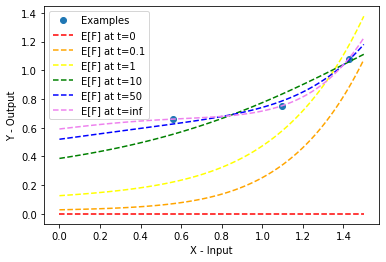

In [7]:
F_X_test_0 = 1/np.sqrt(N_par)*Theta_0 @ Phi_X_test
Phi_X_ex = phi(X_ex)
F_X_ex_0 = 1/np.sqrt(N_par)*Theta_0 @ Phi_X_ex


plt.plot(X_ex,Y_ex,marker='o',linestyle='None',label="Examples")

#Kernel applied to the examples
K_Xex_Xex = 1/N_par * Phi_X_ex.T @ Phi_X_ex
K_inv = np.linalg.inv(K_Xex_Xex)
K_Xtest_Xex = 1/N_par * Phi_X_test.T @ Phi_X_ex

Id_Nex = np.eye(N_ex,N_ex)

colors = ['red','orange','yellow','green','blue', 'indigo', 'violet']

for i,t in enumerate([0, 0.1, 1, 10, 50]):
  exp_minustK = la.expm(-t*K_Xex_Xex)
  #F_X_test_t = F_X_test_0 - K_Xtest_Xex @ K_inv @ (exp_minustK - Id_Nex) @ (Y_ex - F_X_ex_0)
  EF_X_test_t = - K_Xtest_Xex @ K_inv @ (exp_minustK - Id_Nex) @ (Y_ex)
  #plt.plot(X_test,F_X_test_t,marker='',linestyle='-',label=f"F at t={t}",color=colors[i])
  plt.plot(X_test,EF_X_test_t,marker='',linestyle='--',label=f"E[F] at t={t}",color=colors[i])


EF_X_test_inf = K_Xtest_Xex @ K_inv @ (Y_ex)
plt.plot(X_test,EF_X_test_inf,marker='',linestyle='--',label="E[F] at t=inf",color=colors[-1])


plt.xlabel("X - Input")
plt.ylabel("Y - Output")
plt.legend()

# Animation

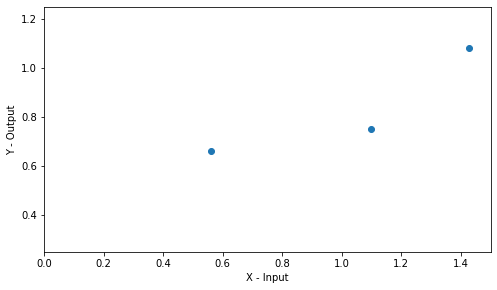

In [8]:
%matplotlib inline

# create a figure and axes
fig = plt.figure(figsize=(8,4.5))
ax1 = plt.subplot(1,1,1) 
ax1.plot(X_ex,Y_ex,marker='o',linestyle='None',label="Examples")

# set up the subplots as needed
ax1.set_xlim(( 0, X_max))            
ax1.set_ylim((0.25, 1.25))
ax1.set_xlabel('X - Input')
ax1.set_ylabel('Y - Output')


# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects
line2, = ax1.plot([], [], 'k', lw=2, ls='--')     # ax.plot returns a list of 2D line objects

#ax1.legend(['sin','cos']);

In [9]:
# animation function. This is called sequentially
def drawframe(n_frame):
  t = n_frame/10
  exp_minustK = la.expm(-t*K_Xex_Xex)
  F_X_test_t = F_X_test_0 - K_Xtest_Xex @ K_inv @ (exp_minustK - Id_Nex) @ (Y_ex - F_X_ex_0)
  E_X_test_t = - K_Xtest_Xex @ K_inv @ (exp_minustK - Id_Nex) @ (Y_ex)
  line1.set_data(X_test,F_X_test_t)
  line2.set_data(X_test,E_X_test_t)
  txt_title.set_text(f'Time = {t}')
  return (line1,line2)

In [10]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=500, interval=20, blit=False)

In [11]:
from IPython.display import HTML
HTML(anim.to_html5_video())

# Kernel Envelope

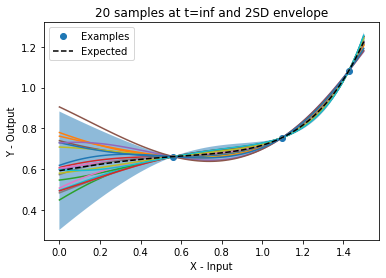

In [12]:
N_samples = 20
plt.plot(X_ex,Y_ex,marker='o',linestyle='None',label="Examples")

for i in range(N_samples):
  Theta_0 = np.random.randn(N_par)
  F_X_test_0 = 1/np.sqrt(N_par)*Theta_0 @ Phi_X_test
  F_X_ex_0 = 1/np.sqrt(N_par)*Theta_0 @ Phi_X_ex

  F_X_test_inf = F_X_test_0 + K_Xtest_Xex @ K_inv @ (Y_ex - F_X_ex_0)

  plt.plot(X_test,F_X_test_inf,marker='',linestyle='-')


Expected_F_inf = K_Xtest_Xex @ K_inv @ (Y_ex)
Exected_Var_inf = np.diagonal(K_Xtest_Xtest - K_Xtest_Xex @ K_inv @ K_Xtest_Xex.T)
SD = np.sqrt(Exected_Var_inf)
plt.plot(X_test, Expected_F_inf, ls = '--',color='k', label="Expected")
plt.fill_between(X_test,Expected_F_inf-2*SD,Expected_F_inf+2*SD,alpha=0.5)

plt.xlabel("X - Input")
plt.ylabel("Y - Output")
plt.title(f"{N_samples} samples at t=inf and 2SD envelope")
plt.legend()